<h1>1.4</h1>

In our proposal, we would like to analyze the gas consumption data further by applying clustering method to measure the similarity between the households, and group them based on energy usage. The goal in clustering time‐series data is to understand user behavior by organizing the data into homogeneous groups, maximizing the similarity and dissimilarity within and between groups, respectively.

Clustering is a collection of same group similar or data objects or in other groups. Its also finding the dissimilar to the data objects in other groups.In cluster analysis, the main objective is to find similarities between data objects with the help of specific characteristics found in the data and grouping these similar data objects into clusters. In our project, the following features and their respective standard deviation will be examined in the following clustering discussion.    

<table>
<tr>
<th>Features</th>
<th>Discription</th>
</tr>
<tr>
<td>Total consumption</td>
<td>Total consumed power during period of the study</td>
</tr>
<tr>
<td>Morning consumtption</td>
<td>The consumption observed from 06:00 - 09:00</td>
</tr>
<tr>
<td>Noon consumtption</td>
<td>The consumption observed from 11:00 - 14:00</td>
</tr>
<tr>
<td>Night consumtption</td>
<td>The consumption observed from 17:00 - 20:00</td>
</tr>
</table>

Potential application areas for work using this form of cluster analysis as more smart data becomes routinely available include
1. Application of cluster results for segment-specific rate design: the economic benefits of time-variable natural gas rates consist in the potential for utilities to improve price discrimination and to facilitate the reduction of peak loads. A complete design of gas scheme would encompass number of different time zones and starting time of each period. All these could be done through clustering analysis. In addition, by influencing the demand side, segment-specific natural gas rates can improve the energy system’s efficiency.

2. Application of cluster results for leak detection activities based on detecting pattern changes (deviation from cluster centroids/ distributions); data-driven models of demand could also help identify atypical customers or unusual changes in consumption. 

3. Application of cluster results for filling missing data for audits/ regulatory purposes using cluster centroids. Typical usage perhaps allowS volumetric usage and flow profiles to be estimated for unmetered customers.

In [79]:
import numpy as np
import pandas as pd
from ipywidgets import FloatProgress
from IPython.display import display
from pathlib import Path
import timeit
import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.decomposition import PCA
from IPython.display import HTML
from sklearn.datasets import load_iris
from sklearn import preprocessing

In [80]:
path = str(Path().resolve().parent)+'\csv'
df = pd.read_csv(path+"/hourly_readings_with_consumption.csv")

headers = ["dataid", "totoalConsumption", "morningTotal","morningMean", "morningSTD", "noonTotal","noonMean",
          "noonSTD", "nightTotal","nightMean", "nightSTD"]
currentID = df.iloc[0]['dataid']
baseTime = df.iloc[0]['time'] 
featuresList = []
morningConsumption = []
noonConsumption = []
nightConsumption = []
totoalConsumption = 0
currentMorning = 0
currentNoon = 0
currentNight = 0
prevDay = df.iloc[0]['day']

In [81]:
# Feature Extraction 
for row in df.itertuples():
    currentTime = row.time
    hrs_diff = int(currentTime.split(":")[0][:2])
    currentDay = row.day
    if (currentDay != prevDay):
        morningConsumption.append(currentMorning)
        noonConsumption.append(currentNoon)
        nightConsumption.append(currentNight)
        prevDay = currentDay
        currentMorning = 0
        currentNoon = 0
        currentNight = 0
        
    if (currentID != row.dataid):
        features = []
        morningTotal = np.sum(morningConsumption)
        morningMean = np.mean(morningConsumption)
        morningSTD = np.std(morningConsumption)
        
        noonTotal = np.sum(noonConsumption)
        noonMean = np.mean(noonConsumption)
        noonSTD = np.std(noonConsumption)
        
        nightTotal = np.sum(nightConsumption)
        nightMean = np.mean(nightConsumption)
        nightSTD = np.std(nightConsumption)
        
        features.append(currentID)
        features.append(totoalConsumption)
        features.append(morningTotal)
        features.append(morningMean)
        features.append(morningSTD)
        features.append(noonTotal)
        features.append(noonMean)
        features.append(noonSTD)
        features.append(nightTotal)
        features.append(nightMean)
        features.append(nightSTD)
        featuresList.append(features)
        
        morningConsumption = []
        noonConsumption = []
        nightConsumption = []
        totoalConsumption = 0
        currentID = row.dataid
    
    totoalConsumption = totoalConsumption + int(row.consumption)
    if (hrs_diff >= 6 and hrs_diff < 9):
        currentMorning = currentMorning + int(row.consumption)
    elif (hrs_diff >= 11 and hrs_diff < 14):
        currentNoon = currentNoon + int(row.consumption)
    elif (hrs_diff >= 17 and hrs_diff < 20):
        currentNight = currentNight + int(row.consumption)

morningConsumption.append(currentMorning)
noonConsumption.append(currentNoon)
nightConsumption.append(currentNight)
morningMean = np.mean(morningConsumption)
morningSTD = np.std(morningConsumption)
noonMean = np.mean(noonConsumption)
noonSTD = np.std(noonConsumption)
nightMean = np.mean(nightConsumption)
nightSTD = np.std(nightConsumption)
features = []

features.append(currentID)
features.append(totoalConsumption)
features.append(morningTotal)
features.append(morningMean)
features.append(morningSTD)
features.append(noonTotal)
features.append(noonMean)
features.append(noonSTD)
features.append(nightTotal)
features.append(nightMean)
features.append(nightSTD)
featuresList.append(features)

featureFrame = pd.DataFrame(featuresList)
featureFrame.to_csv(path + '/reading_features.csv', header=headers, index=None)

K-medoids clustering selects the most centrally located data points within clusters as cluster centers called medoids and returns the number of clustering as required.

In [82]:
df = pd.read_csv(path+"/reading_features.csv")
featureNames = ["totoalConsumption", "morningMean", "noonMean", "nightMean"]

# Normalise the data
x = df[featureNames].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

kmeans = KMeans(n_clusters=3).fit(df_normalized)
df.insert(loc=0, column="classification", value=kmeans.labels_)
df.to_csv(path + '/reading_features_classification.csv', index=None)

Text(0,0.5,'Morning Average Consumption')

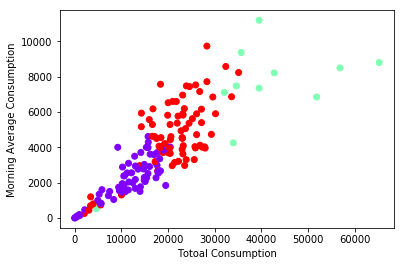

In [83]:
df_array = df.values
plt.scatter(df_array[:,2],df_array[:,3], c=kmeans.labels_, cmap='rainbow')  
plt.xlabel('Totoal Consumption')
plt.ylabel('Morning Average Consumption')

Text(0,0.5,'Noon Average Consumption')

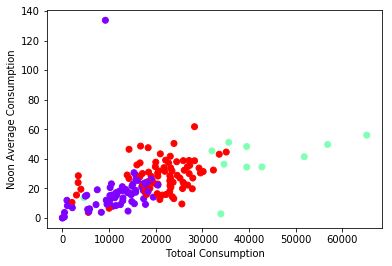

In [84]:
df_array = df.values
plt.scatter(df_array[:,2],df_array[:,5], c=kmeans.labels_, cmap='rainbow')  
plt.xlabel('Totoal Consumption')
plt.ylabel('Noon Average Consumption')

Text(0,0.5,'Night Average Consumption')

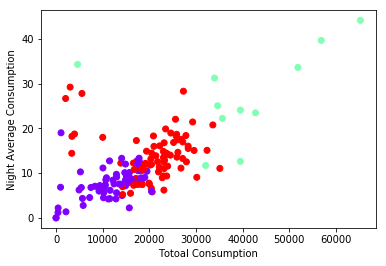

In [85]:
df_array = df.values
plt.scatter(df_array[:,2],df_array[:,7], c=kmeans.labels_, cmap='rainbow')  
plt.xlabel('Totoal Consumption')
plt.ylabel('Night Average Consumption')

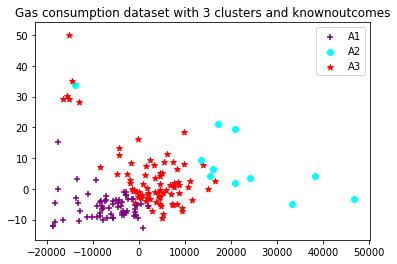

In [86]:
pca = PCA(n_components=2).fit(df[featureNames])
pca_2d = pca.transform(df[featureNames])
for i in range(0, pca_2d.shape[0]):
    if df.classification[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='purple',marker='+')
    elif df.classification[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='cyan',marker='o')
    elif df.classification[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='red',marker='*')
pl.legend([c1, c2, c3], ['A1', 'A2','A3'])
pl.title('Gas consumption dataset with 3 clusters and knownoutcomes')
pl.show()

In conclusion, data clustering is used to find similar groups having the same gas consumption patterns. Smart meter data clustering has been widely investigated toward consumers grouping and revealing their energy usage behavior which leads to more efficient tariff policy and tailored energy efficiency programs for specific users. More specific data analysis and comparison will be shown in section 3.